# Problem Statement
We will develop a prediction model to predict the impact of vehicle horsepower (MPH) on fuel economy (MPG). We will apply many of the same techniques used on our other module on simple linear regression to this problem.

### Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### Importing the Dataset

In [2]:
fuel_df = pd.read_csv('FuelEconomy.csv')

## Exploratory Data Analysis (EDA)

In [3]:
fuel_df.sample(5)

,Horse Power,Fuel Economy (MPG)
5,175.838106,24.173571
35,301.054182,15.725650
15,259.183192,20.467374
32,312.492210,15.618956
84,224.342078,21.701202


In [5]:
fuel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Horse Power,100.0,213.676190,62.061726,50.0,174.996514,218.928402,251.706476,350.0
Fuel Economy (MPG),100.0,23.178501,4.701666,10.0,20.439516,23.143192,26.089933,35.0


In [6]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Horse Power           100 non-null float64
Fuel Economy (MPG)    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


### Visualizations

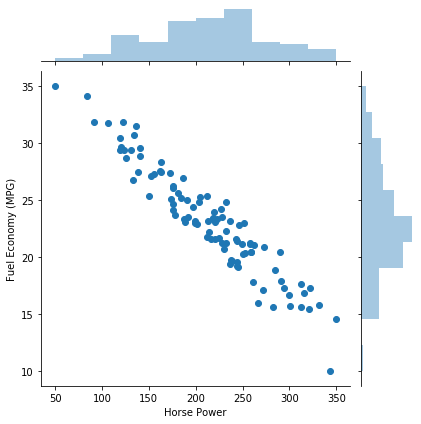

In [8]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuel_df)
plt.show()

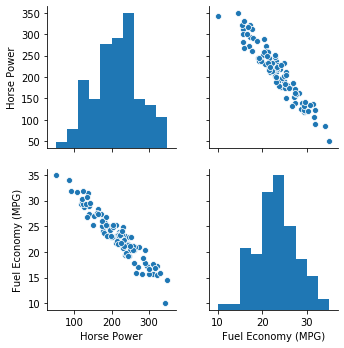

In [10]:
sns.pairplot(fuel_df)
plt.show()

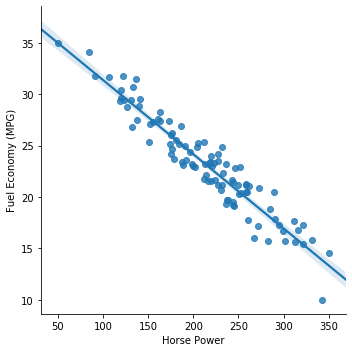

In [12]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuel_df)
plt.show()

## Training our Model

In [22]:
X = fuel_df[['Horse Power']]
y = fuel_df[['Fuel Economy (MPG)']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing our Model

In [37]:
print(f'Regressor Coefficients (b_0): {regressor.intercept_}')
print(f'Regressor Coefficients (b_1): {regressor.coef_}')

Regressor Coefficients (b_0): [38.87725908]
Regressor Coefficients (b_1): [[-0.0733005]]


In [25]:
y_pred = regressor.predict(X_test)

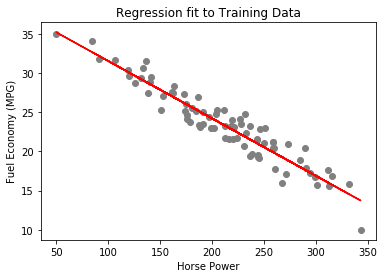

In [29]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Regression fit to Training Data')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.show()

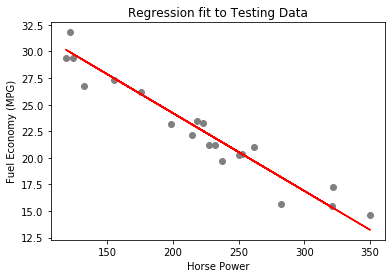

In [30]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red')
plt.title('Regression fit to Testing Data')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.show()

## Evaluating our Model
We will use evaluate the effectiveness of our model to our training data by using statistics metrics of mean squared error (MSE), root mean squared error (RMSE), and $R^2$ or the coefficient of determination:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2} $$

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_i e_i^2}{\sum_i (y_i-\bar{y})^2} $$

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_pred=regressor.predict(X_test), y_true=y_test)
print(f'MSE on test data is: {mse}')
print(f'RMSE on test data is: {sqrt(mse)}')

MSE on test data is: 1.580008978263431
RMSE on test data is: 1.2569840803540158


In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred=regressor.predict(X_test), y_true=y_test)
print(f'R^2 Score is: {r2}')

R^2 Score is: 0.9291686655135908
